<a href="https://colab.research.google.com/github/elleniayele/Prediction-of-Product-Sales1/blob/main/Copy_of_prediction_of_sales_in_pipelines_and_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
set_config(display='diagram')
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [2]:

filename ='sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [4]:
df.shape

(8523, 12)

In [5]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [6]:
for col in df:
 print(col)
 print(df[col].unique())
 print('\n\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']



Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7

we have to fix inconsistencies with item_fat_content column

In [7]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.lower()

In [8]:
df=df.replace(['lf','reg'],['low fat','regular'])
df['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

now lets convert the ordinal type to ordered numeric type

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Text(0.5, 1.0, 'Item outlet sales by item type')

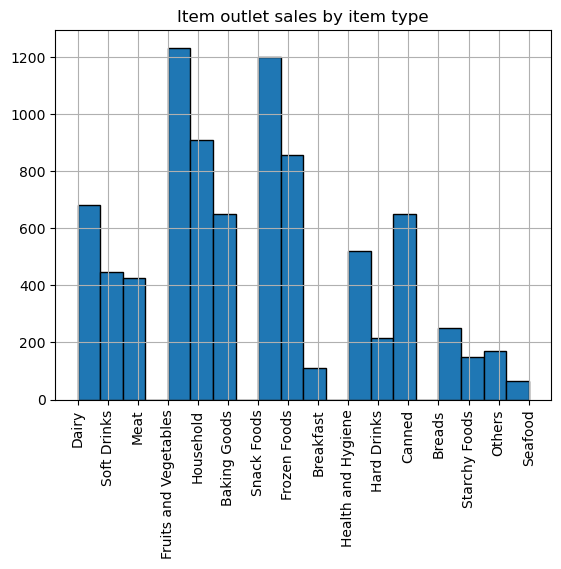

In [10]:
ax = df['Item_Type'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by item type")

Text(0.5, 1.0, 'Item outlet sales by item type')

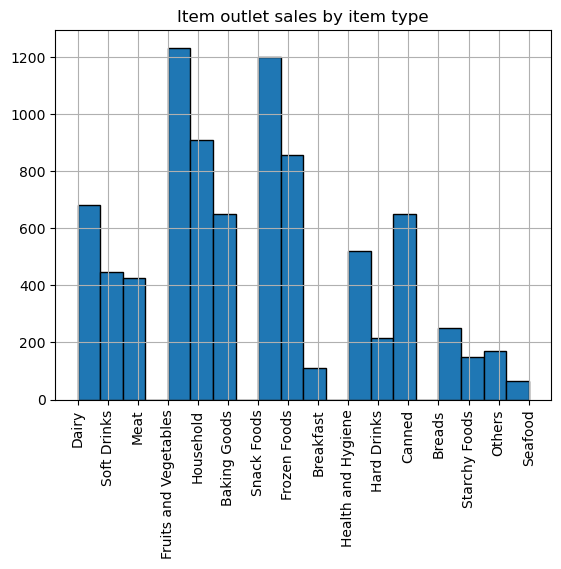

In [11]:
ax = df['Item_Type'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by item type")

Text(0.5, 1.0, 'Item outlet sales by item fat content')

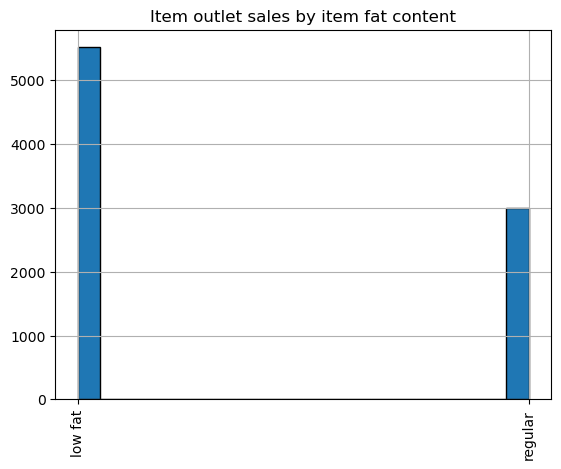

In [12]:
ax = df['Item_Fat_Content'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by item fat content")

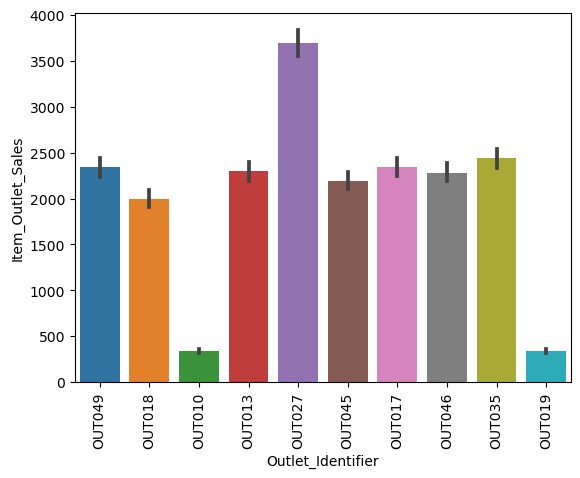

In [13]:
df['Outlet_Identifier']
ax =  sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

Text(0.5, 1.0, 'Item outlet sales by outlet ')

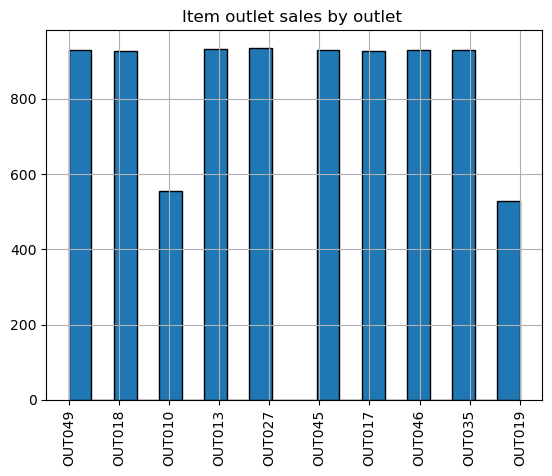

In [14]:
ax = df['Outlet_Identifier'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by outlet ")

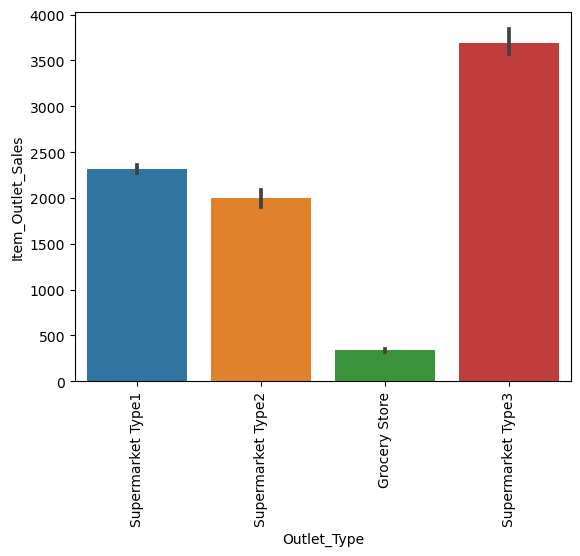

In [15]:
df['Outlet_Type']
ax =  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

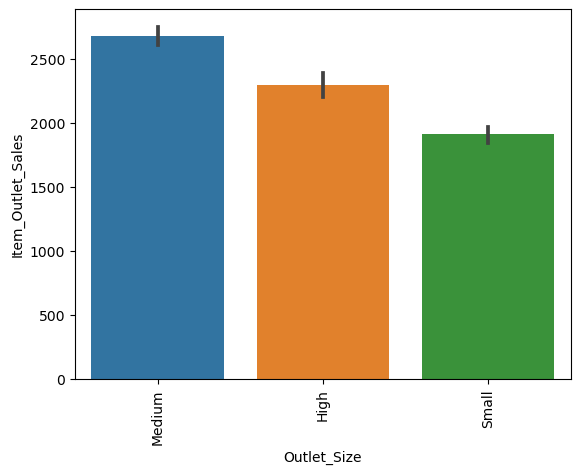

In [16]:
df['Outlet_Size']
ax =  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

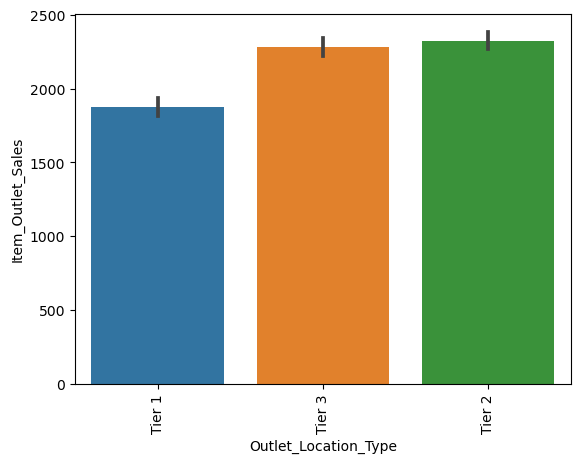

In [17]:
ax =  sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

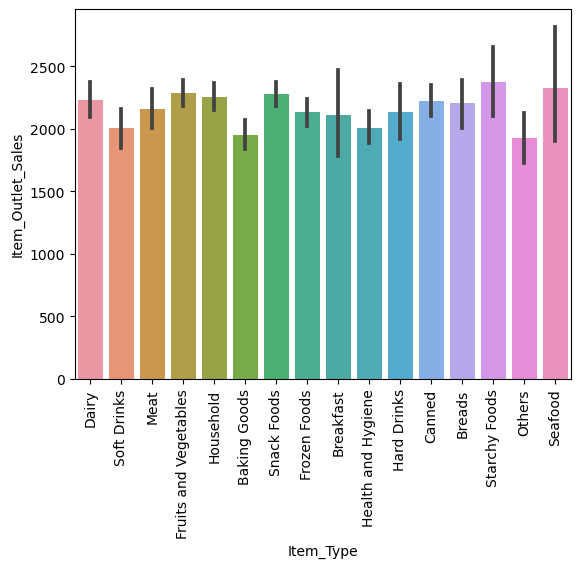

In [18]:
ax = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

In [19]:
df.drop(columns='Item_Identifier',inplace= True, axis=1)

In [20]:
df.drop(columns=['Item_Visibility','Outlet_Establishment_Year'], inplace= True, axis=1)

In [21]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

In [35]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(drop='first', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))



In [36]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000237601436A0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002376009A220>)],
                  verbose_feature_names_out=False)

In [37]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

C:\Users\awot1\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Item_Weight', 'Item_MRP', 'Item_Fat_Content_regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Typ

In [38]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Weight,Item_MRP,Item_Fat_Content_regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.35,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,15.25,179.7660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5828,12.35,157.2946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_MRP,Item_Fat_Content_regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.30,79.4302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2957,7.93,42.7086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7031,14.50,42.0454,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

7503    1743.0644
2957     356.8688
7031     377.5086
Name: Item_Outlet_Sales, dtype: float64

In [29]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")


# LinearRegression
- Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
- Extract and visualize the coefficients that your model determined.
- Select the top 3 most impactful features and interpret their coefficients in plain English.
Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [42]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg,X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1139.29
Test Data:	R^2= 0.57	RMSE= 1092.66


In [43]:
lin_reg.coef_

array([-1.87166697e+00,  1.57227364e+01,  6.15418831e+01, -2.84602609e+01,
        3.96006050e+01,  2.85790685e+01, -1.08774236e+02, -9.23555923e-01,
        4.61525178e+01,  1.58209988e+01,  3.23661698e+01,  8.15352291e+00,
       -8.66944193e+00, -2.23319573e+01,  3.29946945e+02, -2.06964483e+01,
       -3.73882561e+01,  4.10475358e+01,  3.13939755e+02,  4.14226804e+02,
        1.13979444e+02, -5.61614182e+02,  9.68516765e+02, -6.96775931e+01,
        2.72420206e+02,  4.00821462e+02, -4.00388779e+02, -7.65576871e+02,
        6.82107429e+02, -2.30470314e+02,  6.16969417e+02, -5.57879176e+01,
        9.31341854e+02,  1.13979444e+02,  9.68516765e+02])

In [46]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [47]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

intercept                         -1064.442733
Outlet_Size_MISSING                -765.576871
Outlet_Identifier_OUT019           -561.614182
Outlet_Identifier_OUT049           -400.388779
Outlet_Size_Small                  -230.470314
Item_Type_Dairy                    -108.774236
Outlet_Identifier_OUT035            -69.677593
Outlet_Location_Type_Tier 3         -55.787918
Item_Type_Soft Drinks               -37.388256
Item_Type_Breads                    -28.460261
Item_Type_Others                    -22.331957
Item_Type_Snack Foods               -20.696448
Item_Type_Meat                       -8.669442
Item_Weight                          -1.871667
Item_Type_Frozen Foods               -0.923556
Item_Type_Household                   8.153523
Item_MRP                             15.722736
Item_Type_Hard Drinks                15.820999
Item_Type_Canned                     28.579069
Item_Type_Health and Hygiene         32.366170
Item_Type_Breakfast                  39.600605
Item_Type_Sta

In [53]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

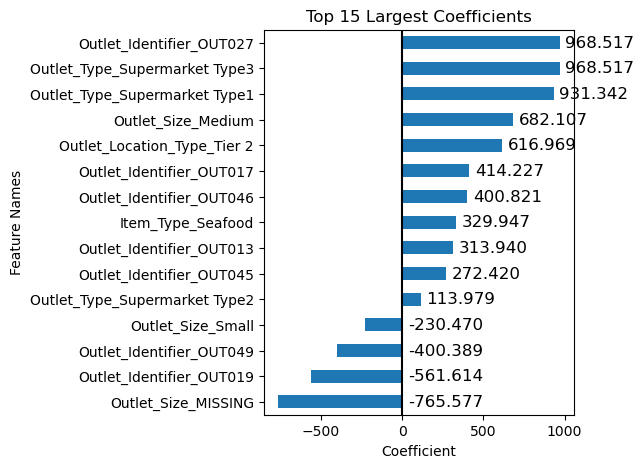

In [54]:
ax = plot_coeffs(coeffs,top_n=15)
annotate_hbars(ax)

In [55]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax


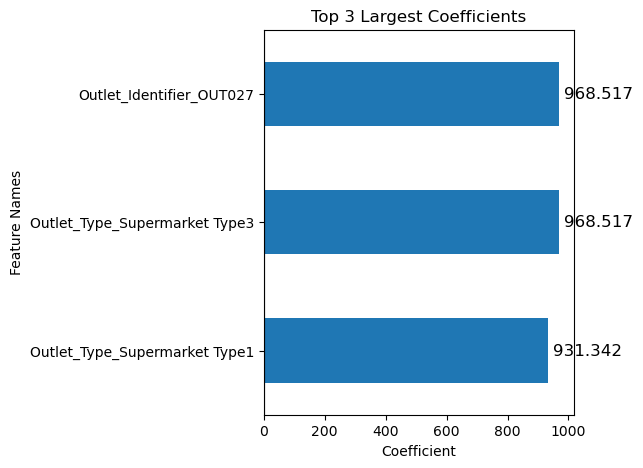

In [57]:
plot_coeffs(coeffs, top_n=3, annotate=True);

Select the top 3 most impactful features and interpret their coefficients in plain English. Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

- outlet_identifier_out027:

 outlet_identifier_out027 is the most impactful feature in which increased the predicted sale by 968.517 dollars.
  
 - outlet_type_supermarket type 3 :
 
  the outlet type supermarket type 3 increased the    predicted sale by 968.517 dollars.
 - outlet_type_supermarket type 3 :
 
 the  outlet_type_supermarket type 3 increased the predicted sale by 931.342 dollars.

# Tree-Based Model

- Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
- Extract and visualize the feature importances that your model determined.
- Identify the top 5 most important features.
- Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

In [69]:
## Fitting and evaluating the model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df, y_train)
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 436.59
Test Data:	R^2= 0.53	RMSE= 1132.81


In [70]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances



In [75]:
importances = get_importances(rf_reg,sort=True,ascending=False)
importances

Item_MRP                           0.493819
Outlet_Type_Supermarket Type1      0.092182
Item_Weight                        0.078891
Outlet_Type_Supermarket Type3      0.061222
Outlet_Identifier_OUT027           0.049505
Outlet_Identifier_OUT018           0.026730
Outlet_Size_Medium                 0.022385
Outlet_Type_Supermarket Type2      0.020375
Item_Fat_Content_regular           0.012796
Item_Type_Snack Foods              0.011006
Item_Type_Fruits and Vegetables    0.010890
Item_Type_Household                0.008789
Item_Type_Dairy                    0.008255
Item_Type_Frozen Foods             0.007878
Item_Type_Soft Drinks              0.006515
Outlet_Identifier_OUT046           0.006189
Item_Type_Canned                   0.005937
Outlet_Identifier_OUT017           0.005706
Outlet_Identifier_OUT045           0.005623
Outlet_Size_Small                  0.005337
Outlet_Location_Type_Tier 2        0.005252
Outlet_Identifier_OUT035           0.005204
Item_Type_Meat                  

In [72]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

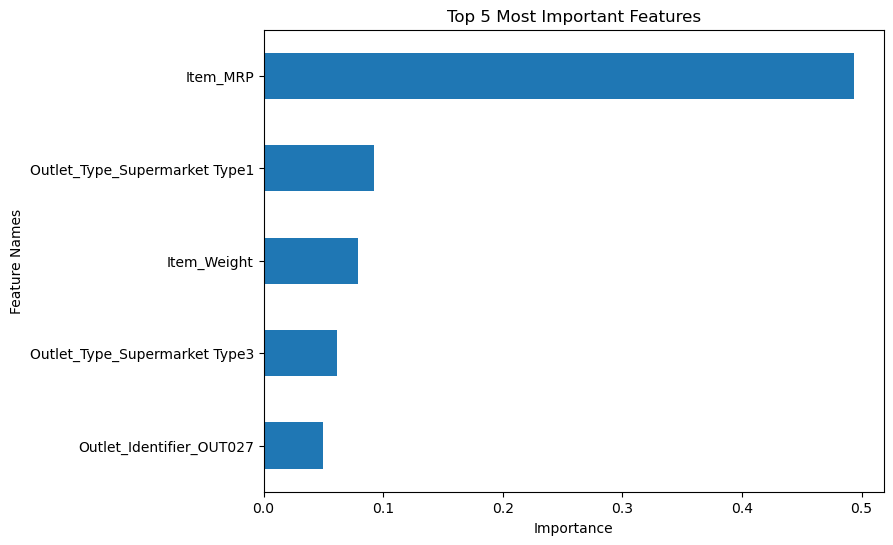

In [76]:
## testing our function
importances = get_importances(rf_reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=5);



In [74]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
        'linear Regression':lin_reg,
         'RandomForest':rf_reg}
joblib.dump(export, 'best-models.joblib')


['best-models.joblib']